In [169]:
#importing necessary packages
import cv2
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt

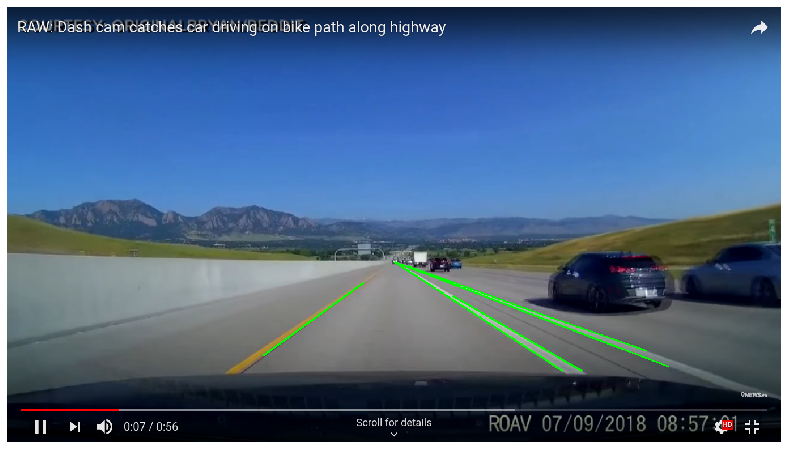

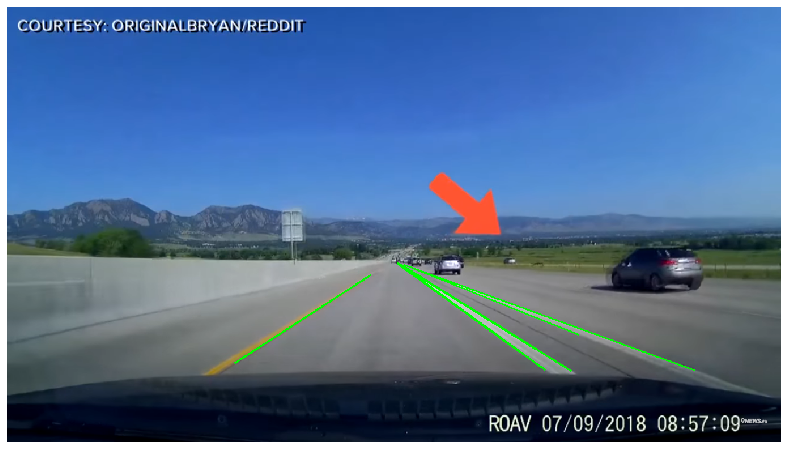

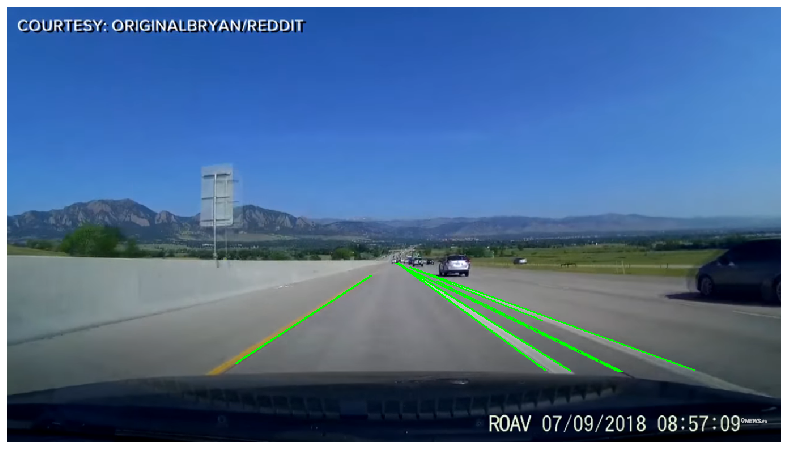

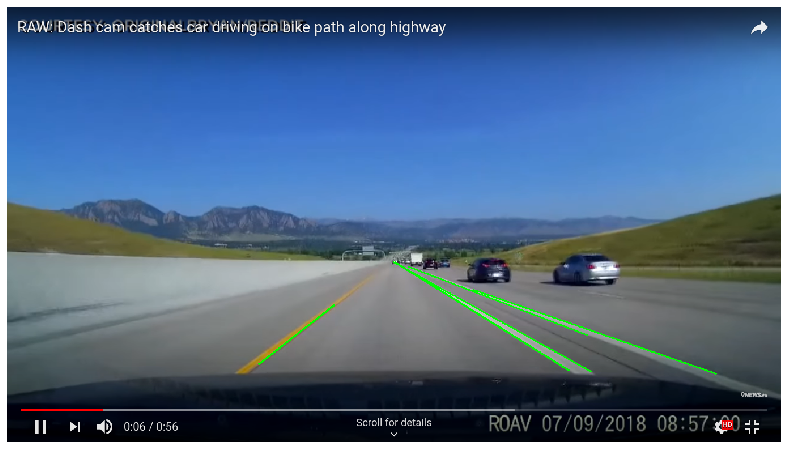

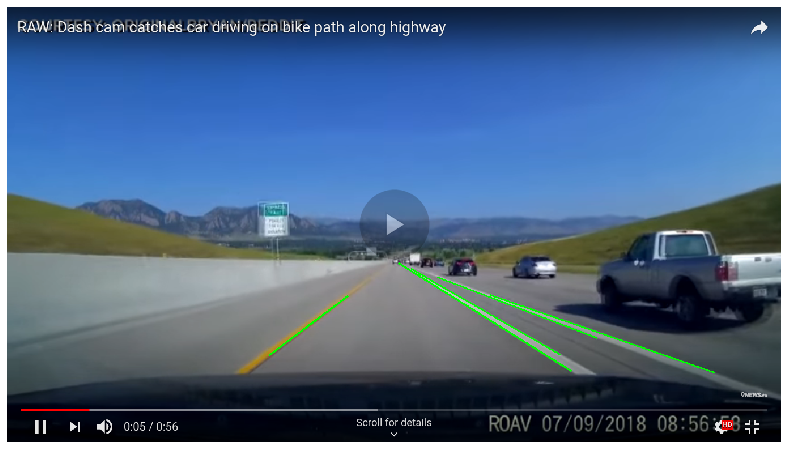

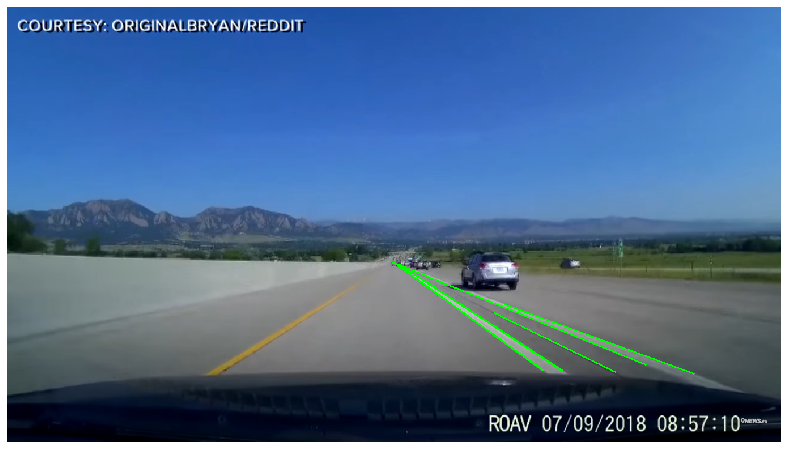

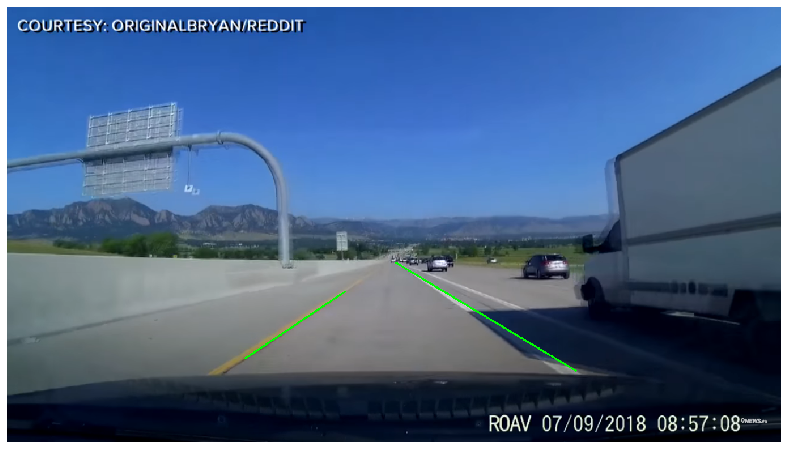

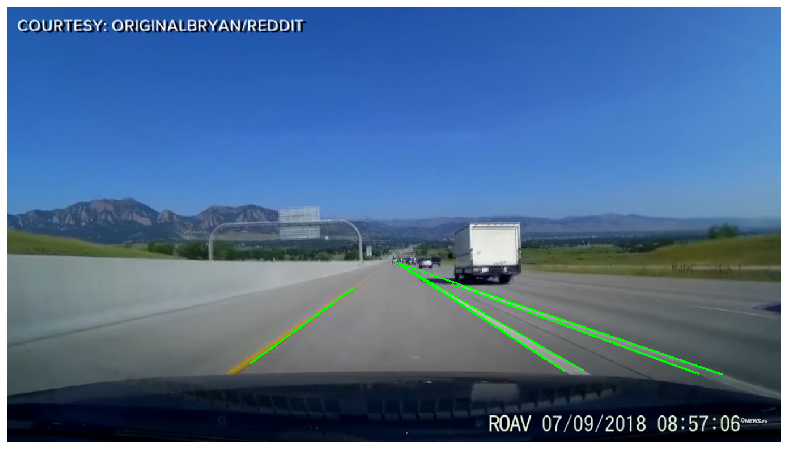

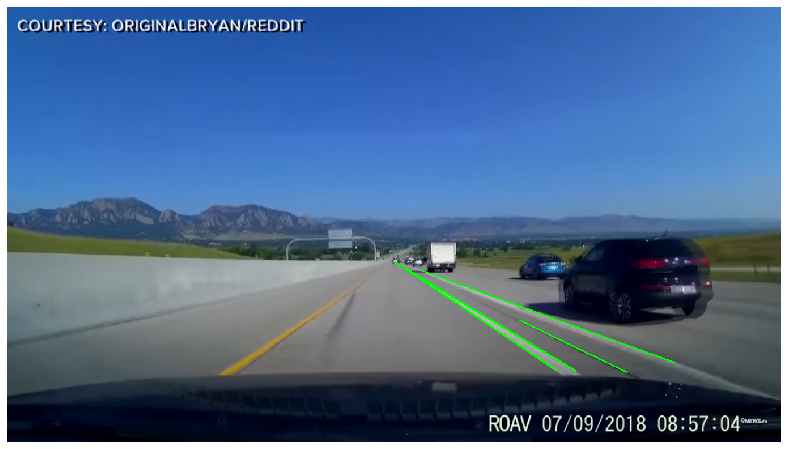

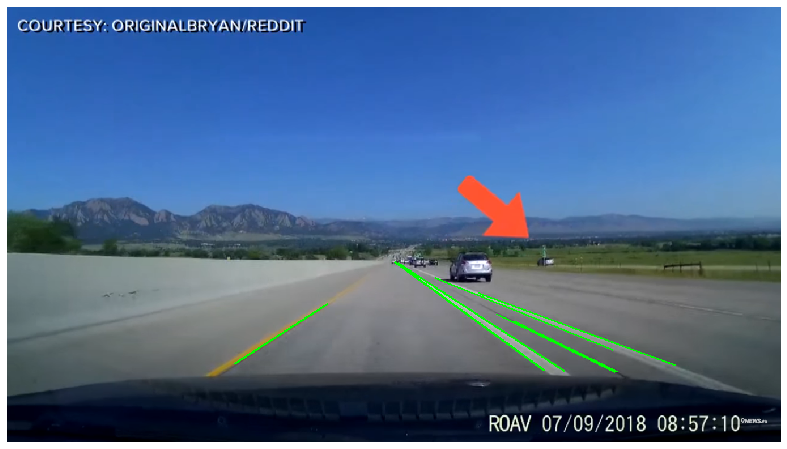

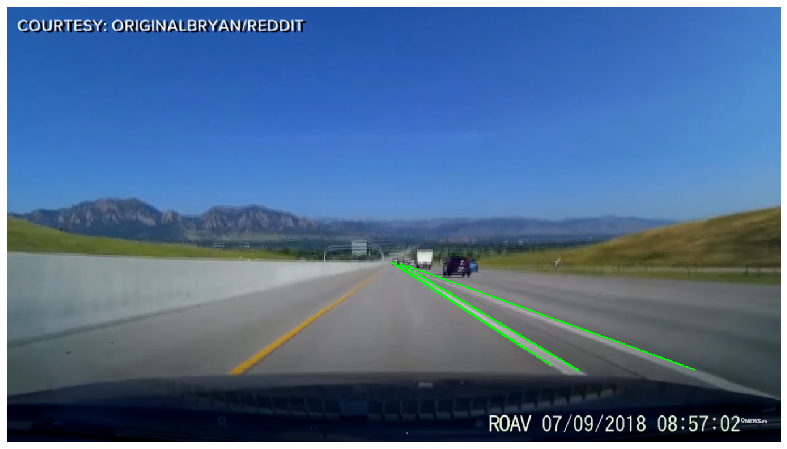

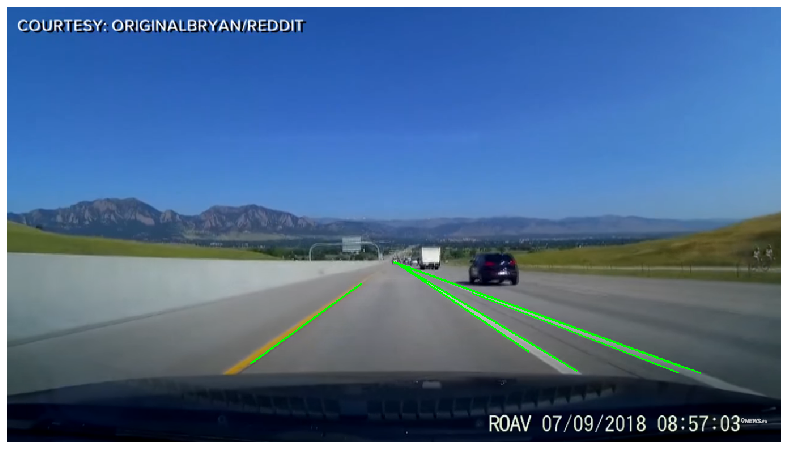

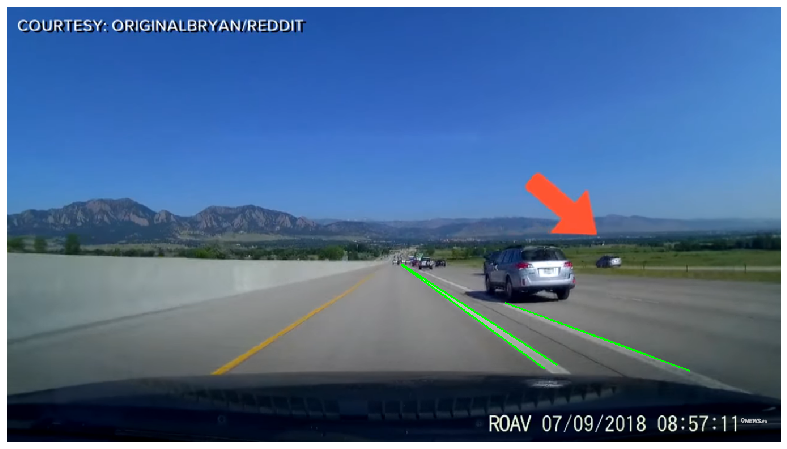

In [172]:
path = '/home/subarna/Documents/ml_notebooks/lane_images/'
filenames = glob.glob(path + "/*.png")
i = 0
for filename in filenames:
    
    #reading of images 
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #extracting height and widht of the image
    height = img.shape[0]
    width = img.shape[1]
    roi_ver = [(0,620),(width/2,450),(width,650)]
    
    #extracting particular part of the image
    def roi(img,vertices):
        mask = np.zeros_like(img)
        match_mask_color = 255
        cv2.fillPoly(mask,vertices,match_mask_color)
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image

    #converting image into grayscale
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    #applying canny image detector with approximate threshold values to detect necessary edges(lanes)
    canny_img = cv2.Canny(gray_img,50,150)
    
    #cropping region of interest
    cropped_image =  roi(canny_img, np.array([roi_ver], np.int32))
    
    #plotting lines over edges using HoughLinesP
    lines = cv2.HoughLinesP(cropped_image, 1, np.pi/180, 150, minLineLength = 100, maxLineGap = 50)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
    #display and saving of results
    plt.figure(figsize = (20,8))
    plt.axis('off')
    plt.imshow(img)
    plt.savefig("image"+str(i))
    i = i + 1